# Scikit-learn

***

## Overview of scikit-learn
Scikit-learn is a free software machine learning library for the Python programming language. It provides many unsupervised and supervised learning algorithms, the library is focused on modeling data.



### Algorithms
For this module I have been tasked to demonstrate at least three scikit-learn algorithms. The first of which is:
- [K-means Algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Examples](https://scikit-learn.org/stable/auto_examples/index.html#cluster-examples)


# K-means
The KMeans algorithm is an unsupervised clustering machine learning algorithm. A cluster referes to a collection of data points paired together because of certain similarities. This algorithm assumes the number of clusters are pre-defined. The k-means algorithm divides a set of ***N*** samples ***X*** into ***K*** disjoint clusters ***C*** , each described by the mean ***u***  of the samples in the cluster. The means are commonly called the cluster “centroids”; Centroids are initialized by shuffling the dataset and randomly selecting x data points for the centroids. This algorithm calculates and assigns data points to a cluster such that the sum of the squared distance between the data points and centroids are at a minimum.

The algorithm is very popular and is used in a wide variety of applications such as market segmentation, data clustering, image segmentation and compression. It is an easy algorithm to understand and implement especially with help from the [scikit library](https://scikit-learn.org/stable/modules/clustering.html#k-means). 

### How it works
The Kmean algorithm works as follows:

- **1.** Define the number of clusters *K*
- **2.** Initialize centroids by randomly selecting x amount of data points and assigning them to a cluster
- **3.** Compute the sum of the squared distance between the data points and centroids
     - **3.1** Assign each data point to the closest centroid
     - **3.2** Create new centroids by taking the mean value of all the data points assigned to each previous centroid. 
- **4.** Keep iterating **step 3** until there is little to no significant change to the centroids

The K-means algorithm follows the **Expectation-Maximization** approach to solve the problem. An approach where the Expectation step is assigning the data points to the closest cluster and the Maximization step is computing the centroid of each cluster.






## K-Means example: Color Quantization
Below I will demonstrate an example of implementing the K-means algorithm to perform a pixel-wise Vector Quantization of an image of a flower. Reducing the number of colours required to display the image from 96,615 unique colours to 64, while preserving the quality of the image. Every pixel is a 3 dimensional vector with Red, Green and Blue components. The image itself is 427 pixels by 640 pixels, so the total amount of vectors are 273,280. The algorithm is ran on these colour vectors and will specify 64 clusters. The result shows how the image is reduced to only 64 colours, some information is lost but the overall quality of the photo remains true. 

For comparison, a quantized image useing a random selection of colours is shown.



In [1]:
# Import libaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from skimage import io

In [2]:
# Defined number of clusters
n_colors = 64

In [3]:
# Load the flower photo
flower_img = load_sample_image('flower.jpg')

In [4]:
flower_img.dtype 

dtype('uint8')

In [5]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
flower_img = np.array(flower_img, dtype=np.float64) / 255

In [6]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower_img.shape)
assert d == 3
image_array = np.reshape(flower_img, (w * h, d))

In [7]:
# Initialize centroids by randomly selecting x amount of data points and assigning them to the image_array_sample
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.238s.


In [8]:
# Get labels for all points
# Then using the Kmeans predict method, iterates through each data point until there is no change to the clusters
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.056s.


In [9]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

NameError: name 'codebook_random' is not defined

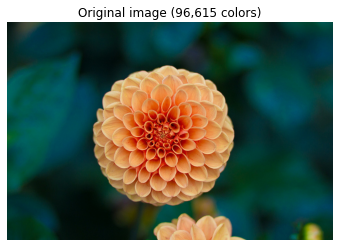

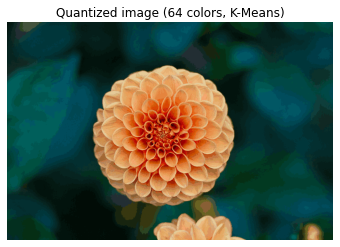

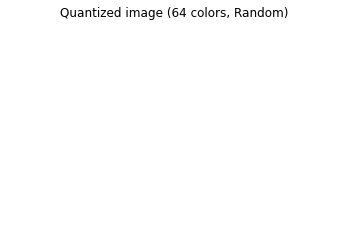

In [10]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(flower_img)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

***